In [0]:
import torch
import torch.nn as nn
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

torch.manual_seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
def zero_pad(X, pad):
    _pad = nn.ZeroPad2d(pad)
    X_pad = _pad(X)
    
    
    return X_pad

In [0]:
torch.manual_seed(1)
X = torch.randn(4,2,3,3)

x.shape =
 torch.Size([4, 2, 3, 3])
x_pad.shape =
 torch.Size([4, 2, 7, 7])
x[1,1] =
 tensor([[-1.4465,  0.0612, -0.6177],
        [-0.7981, -0.1316,  1.8793],
        [-0.0721,  0.1578, -0.7735]])
x_pad[1,1] =
 tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -1.4465,  0.0612, -0.6177,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.7981, -0.1316,  1.8793,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.0721,  0.1578, -0.7735,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])


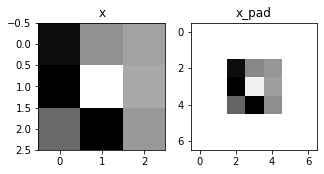

In [0]:
x_pad = zero_pad(X, 2)
print ("x.shape =\n", X.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", X[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(X[0,0,:,:])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,0,:,:])

In [0]:
def conv_single_step(a_slice_prev, W, b):
    s = a_slice_prev * W 
    Z =  torch.sum(s)
    Z = Z + float(b)

    return Z

In [0]:
torch.manual_seed(1)

a_slice_prev = torch.randn(3,4,4)
W = torch.randn(3,4,4)
b = torch.randn(1,1,1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = tensor(-8.5554)


In [0]:
def conv_forward(A_prev, W, b, hparameters): 
    (m, n_C_prev, n_H_prev, n_W_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape 
    (n_C_prev, f, f, n_C) = W.shape
    
    # Retrieve information from "hparameters"
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    n_H = int((n_H_prev+(2*pad)-f)/stride) + 1
    n_W = int((n_W_prev+(2*pad)-f)/stride) + 1 
    
    # Initialize the output volume Z with zeros. 
    Z = torch.zeros((m,n_C,n_H,n_W))

    
    
    # Create A_prev_pad by padding A_prev
    _pad = nn.ZeroPad2d(pad)   
    A_prev_pad = _pad(A_prev)
    
    for i in range(m):               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i,:,:,:]               # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice"
            vert_start = h*stride
            vert_end = (h*stride)+f
                       
            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = w*stride
                horiz_end = (w*stride)+f
                
                for c in range(n_C):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = a_prev_pad[:,vert_start : vert_end,horiz_start :horiz_end]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈3 line)
                    weights = W[:,:,:,c]
                    biases = b[:,:,:,c]
                    Z[i, c, h, w] = conv_single_step(a_slice_prev, weights, biases)
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_C, n_H, n_W))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [0]:
torch.manual_seed(1)
A_prev = torch.randn(10,4,5,7)
W = torch.randn(4,3,3,8)
b = torch.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}


Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", torch.mean(Z))
print("Z[3,2,1] =\n", Z[3,:,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 tensor(-0.3294)
Z[3,2,1] =
 tensor([ 0.5648,  3.0823,  5.3929, -0.4358, -1.9275,  7.4754, -2.3530, -4.6575])
cache_conv[0][1][2][3] =
 tensor([ 0.3872, -0.0798,  0.3417,  0.9488, -1.3839,  1.7241, -2.3648])


Finally, CONV layer should also contain an activation, in which case we would add the following line of code:

```python
# Convolve the window to get back one output neuron
Z[i, c, h, w] = ...
# Apply activation
A[i, c, h, w] = activation(Z[i, c, h, w])
```

You don't need to do it here. 


In [0]:
def pool_forward(A_prev, hparameters, mode = "max"):
    # Retrieve dimensions from the input shape
    (m, n_C_prev, n_H_prev, n_W_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = torch.zeros((m, n_C, n_H, n_W))              
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = vert_start = (stride*h) 
            vert_end = (stride*h) + f
        
            
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" 
                horiz_start = horiz_start =(stride*w) 
                horiz_end = (stride*w) +f
                
                for c in range (n_C):            # loop over the channels of the output volume                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. 
                    a_prev_slice = A_prev[i,vert_start:vert_end , horiz_start : horiz_end , c]
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use torch.max and torch.mean.
                    if mode == "max":
                        A[i, c, h, w] = torch.max(a_prev_slice)
                    elif mode == "average":
                        A[i, c, h, w] = torch.mean(a_prev_slice)
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_C, n_H, n_W))
    
    return A, cache

In [0]:
# Case 1: stride of 1
torch.manual_seed(1)
A_prev = torch.randn(2, 3, 5, 5)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = torch.Size([2, 3, 3, 3])
A =
 tensor([[[[ 2.0154,  2.0154,  1.6734],
          [ 2.0154,  2.0154,  1.6734],
          [ 2.0154,  2.0154,  1.6734]],

         [[ 0.1991,  0.2927,  1.5748],
          [ 0.1991,  0.2927,  1.5748],
          [ 0.1374,  0.1374,  0.0103]],

         [[ 1.8793,  1.8793,  0.0457],
          [ 1.8793,  1.8793,  0.0457],
          [ 0.9386,  0.9386, -0.7040]]],


        [[[ 1.7986,  0.8168,  2.5581],
          [ 1.7986,  0.8168,  2.5581],
          [ 1.7986,  0.3539,  0.0375]],

         [[ 1.1996,  1.1996,  0.7575],
          [ 1.1996,  1.1996,  0.7575],
          [ 1.1996,  1.1996,  0.7575]],

         [[ 0.8738,  0.8738,  1.1899],
          [ 0.8738,  0.8738,  0.8738],
          [ 0.3400, -0.3030, -0.4068]]]])

mode = average
A.shape = torch.Size([2, 3, 3, 3])
A =
 tensor([[[[-1.1540e-01, -7.7895e-03,  9.1505e-02],
          [ 3.1224e-01,  1.4146e-01,  4.4588e-02],
          [ 1.2070e+00,  8.4377e-01,  7.2978e-01]],

         [[-5.9209e-0

In [0]:
# Case 2: stride of 2
torch.manual_seed(1)
A_prev = torch.randn(2, 3, 5, 5)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = torch.Size([2, 3, 2, 2])
A =
 tensor([[[[ 2.0154,  1.6734],
          [ 2.0154,  1.6734]],

         [[ 0.1991,  1.5748],
          [ 0.1374,  0.0103]],

         [[ 1.8793,  0.0457],
          [ 0.9386, -0.7040]]],


        [[[ 1.7986,  2.5581],
          [ 1.7986,  0.0375]],

         [[ 1.1996,  0.7575],
          [ 1.1996,  0.7575]],

         [[ 0.8738,  1.1899],
          [ 0.3400, -0.4068]]]])

mode = average
A.shape = torch.Size([2, 3, 2, 2])
A =
 tensor([[[[-0.1154,  0.0915],
          [ 1.2070,  0.7298]],

         [[-0.5921, -0.0103],
          [-0.3897, -0.4851]],

         [[-0.4041, -0.8698],
          [-0.5433, -1.6802]]],


        [[[-0.0803, -0.0265],
          [ 0.2017, -0.8613]],

         [[-0.0202,  0.0358],
          [ 0.6863, -0.0273]],

         [[-0.2165, -0.0585],
          [-0.1233, -0.5578]]]])
